<a href="https://colab.research.google.com/github/jainharshit3107/Mini-Project/blob/main/ImageClassification(Harshit_Jain).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps Involved in Project
<ol>
  <li>Gathering Data</li>
    <ul>
      <li>Using Bing-Image-Downloader</li>
    </ul>
  <li>Images Consist </li>
    <ol>
       <li>boxing gloves</li>
       <li>single Shuttlecock images</li>
       <li>Baseball bat</li>
    </ol>
  <li>Preprocessing</li>
    <ul>
       <li>Resize</li>
       <li>Flattening</li>
       <li>Normalization</li>
    </ul>
  <li>Hyperparameter Tunning using GridSearchCV</li>
    <ul>
      <li>Algorithms Used</li>
    </ul>
        <ol> 
           <li>Support Vector Machine</li>
           <li>RandomForest Classifier</li>
           <li>LogisticRegression</li>
        </ol>
  <li>Accuracy and Confusion Matrix</li>
    <ul>
       <li>Using Seaborn</li>
    </ul>
  <li>Prediction for new Image</li>
</ol>



In [ ]:
!pip install bing-image-downloader

## Gathering Data

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 138 µs (started: 2021-06-20 13:44:26 +00:00)


In [ ]:
!mkdir images

time: 112 ms (started: 2021-06-20 13:44:26 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("boxing gloves",limit = 30,output_dir = 'images',adult_filter_off=True)

[%] Downloading Images to /content/images/boxing gloves


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.giri.com.au/wp-content/uploads/2017/05/blue-mexican-boxing-gloves.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.punchequipmentusa.com/wp-content/uploads/2019/12/matte-black-gold-lips-bling-boxing-gloves-6-1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://bushido.ca/wp-content/uploads/2017/01/DKOS3026_DrakoTrueNorthBoxingGlove_blk.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://redfit.com.au/wp-content/uploads/2018/05/urban-cobra-boxing-gloves-silver-blue-3.png
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.shopify.com/s/files/1/1529/1871/products/Kai-Youth-Boxing-Gloves-Black_800x.png?v=1501449349
[%] File Downloaded !

[%] Downloading Image #6 from https://i.ebayimg.com/images/i/142031231292-0-1/s-l1000.jpg
[%] File Downloaded !

[%] Downloading Image #7 fr

In [ ]:
from bing_image_downloader import downloader
downloader.download("single shuttlecock images",limit = 30,output_dir = 'images',adult_filter_off=True)


[%] Downloading Images to /content/images/single shuttlecock images


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.ebayimg.com/images/g/qXcAAOSwWzJe4TUq/s-l400.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://fitnessmania.com.au/wp-content/uploads/2018/12/Fitness-Mania-decathlon-Badminton-Shuttlecock-BSC700-White.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ebayimg.com/00/s/MTYwMFgxNjAw/z/PKEAAOSwUSle48Fs/$_62.JPG?set_id=8800005007
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ebayimg.com/images/g/X48AAOSwRd5fAta6/s-l640.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.ebayimg.com/images/g/HnQAAOSwYbJc57W4/s-l640.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://images-na.ssl-images-amazon.com/images/I/41C3vPv%2B5OL.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.ebayimg.com/images/g/Jb0AAOSw5RRe-fAo/s-l640.jpg
[%] File Downloade

In [ ]:
from bing_image_downloader import downloader
downloader.download("baseball bat",limit = 30,output_dir = 'images',adult_filter_off=True)

[%] Downloading Images to /content/images/baseball bat


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://n1.sdlcdn.com/imgs/g/i/x/Genuine-Quality-Wooden-Baseball-Bat-SDL526576581-1-53c15.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from https://truebaseball.net/wp-content/uploads/2019/08/71pn9me6PWL._AC_SL1500_.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.baseballmonkey.com/media/catalog/product/cache/b32e7142753984368b8a4b1edc19a338/t/r/true-baseball-bat-ts-usa-2020-10-inset2.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://cdn.shopify.com/s/files/1/1379/0187/products/005_271_TDS-UT-20-T1X-10_USSSA_DROP10_-_ANGLE6_6913654e-3ffe-43df-9c1e-37d705f8be85_2048x.png?v=1583344333
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn11.bigcommerce.com/s-cehlg7yhg/images/stencil/1280x1280/products/1786/5564/008_243_TDS-UT-20-T2X-10_USSSA_DROP10_-_ANGLE8_e2964e2e-5b8b-4f40-a5c5-d6795e398546

## Preprocessing

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

images = []
target = []
flat_data = []

DATADIR ='/content/images'
CATEGORIES = ['boxing gloves','single shuttlecock images','baseball bat']


for category in CATEGORIES:
  class_num = CATEGORIES.index(category)   
  path = os.path.join(DATADIR,category)    #create path to use images
  
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))  #Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)    

time: 21.5 s (started: 2021-06-20 13:45:17 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 5.13 ms (started: 2021-06-20 13:45:38 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts=True)

time: 1.7 ms (started: 2021-06-20 13:45:38 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 158 ms (started: 2021-06-20 13:45:38 +00:00)


## Hyperparameter Tunning using GridSearchCV

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import pandas as pd

model_params = {
    'svm':{
        'model': svm.SVC(gamma='scale'),
        'params': {
            'C': [1,10,100,1000],
            'kernel': ['linear','rbf']
            
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators':[1,2,10,100]
            
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
   
}


scores=[]

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df=pd.DataFrame(scores,columns=['model','best_score','best_params']) 
df

,model,best_score,best_params
0,svm,0.701282,"{'C': 100, 'kernel': 'rbf'}"
1,random_forest,0.698718,{'n_estimators': 100}
2,logistic_regression,0.682051,{'C': 1}


time: 58.7 s (started: 2021-06-20 13:45:38 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1,
       2, 0, 1, 0, 1])

time: 21.4 ms (started: 2021-06-20 13:46:37 +00:00)


In [ ]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 3.59 ms (started: 2021-06-20 13:46:37 +00:00)


## Accuracy and Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.7777777777777778

time: 10.9 ms (started: 2021-06-20 13:46:37 +00:00)


Text(24.0, 0.5, 'Truth')

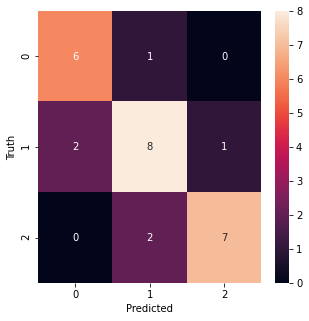

time: 349 ms (started: 2021-06-20 13:46:37 +00:00)


In [ ]:
import seaborn as sn
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize = (5,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.73      0.73      0.73        11
           2       0.88      0.78      0.82         9

    accuracy                           0.78        27
   macro avg       0.78      0.79      0.78        27
weighted avg       0.78      0.78      0.78        27

time: 7.13 ms (started: 2021-06-20 13:46:37 +00:00)


## Prediction for new Image

Enter Your URLhttps://4.imimg.com/data4/GU/JQ/MY-34593403/baseball-bat-png-clipart-picture-png-m-2-500x500.png
(489, 500, 4)
PREDICT OUTPUT:baseball bat


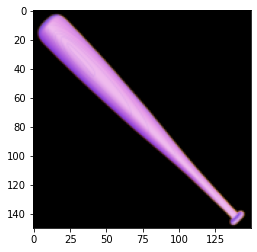

time: 15.4 s (started: 2021-06-20 13:46:37 +00:00)


In [ ]:
flat_data = []
url = input('Enter Your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = clf.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICT OUTPUT:{y_out}')
# Enter your URL -'https://4.imimg.com/data4/GU/JQ/MY-34593403/baseball-bat-png-clipart-picture-png-m-2-500x500.png'